In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

In [47]:
path = "/home/why_feen/Desktop/ML/project/firewall.csv"
df= pd.read_csv(path)
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [3]:
# # Import label encoder
# from sklearn import preprocessing
  
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
  
# # Encode labels in column 'species'.
# df['Action']= label_encoder.fit_transform(df['Action'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


# KNN

In [49]:
def Model(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  #train model
  model = KNeighborsClassifier(n_neighbors = 7)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  #classification report
  
  print("Classification report : \n", classification_report(y_test, y_pred))
  print("AucRoc Score : ", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
  print("Mathew Correlation Coefficient : ", matthews_corrcoef(y_test, y_pred))

In [50]:
df= shuffle(df, random_state=1)
Model(df.drop("Action", axis=1), df["Action"])

/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

       allow       1.00      0.99      0.99     11318
        deny       0.98      0.99      0.98      4489
        drop       1.00      1.00      1.00      3825
  reset-both       0.00      0.00      0.00        28

    accuracy                           0.99     19660
   macro avg       0.74      0.75      0.74     19660
weighted avg       0.99      0.99      0.99     19660

AucRoc Score :  0.9049206767418856
Mathew Correlation Coefficient :  0.9867376509216731


In [51]:
y = df['Action'].values

y = y.reshape(-1,1)

x_data = df.drop(['Action'],axis = 1)
print(x_data)

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
12284         4296                53            43153                    53   
64627        53771             37965                0                     0   
41220        56842             24233            12414                 24233   
32498        50037                53            63751                    53   
1131         51443                53            51443                    53   
...            ...               ...              ...                   ...   
32511        50972              3544            56182                  3544   
5192         49749               445                0                     0   
12172        52248               443            56929                   443   
33003        59077               445                0                     0   
62501        53063                80             2438                    80   

       Bytes  Bytes Sent  Bytes Received  Packets  

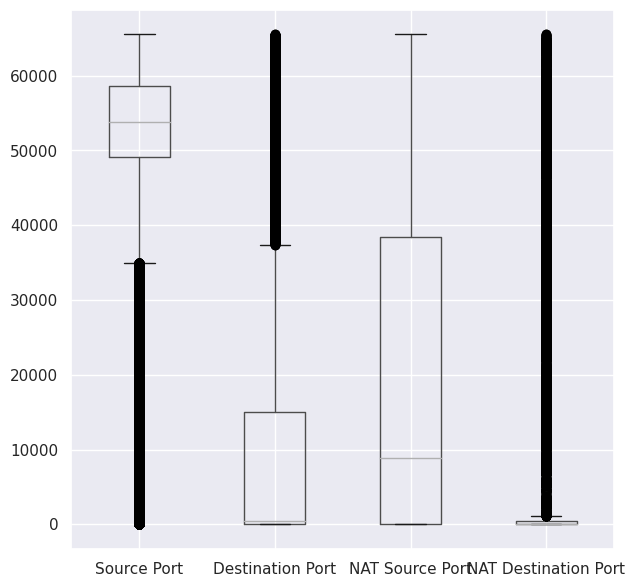

In [52]:
plt.figure(figsize=(7, 7))
df[['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']].boxplot()
plt.show()

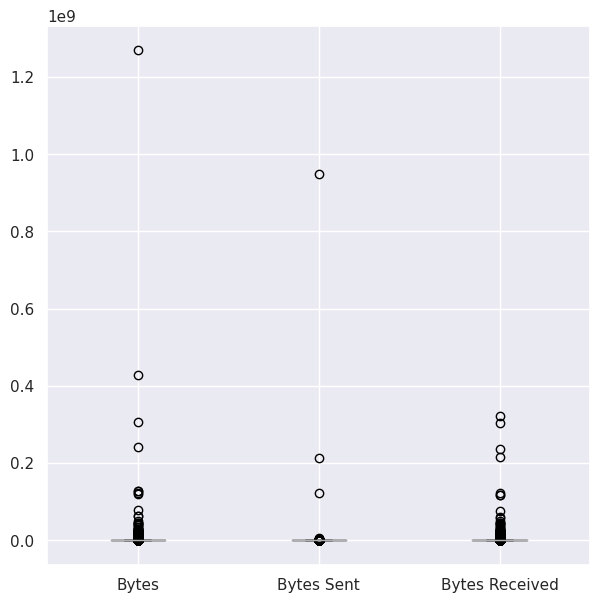

In [53]:
plt.figure(figsize=(7, 7))
df[['Bytes', 'Bytes Sent', 'Bytes Received']].boxplot()
plt.show()

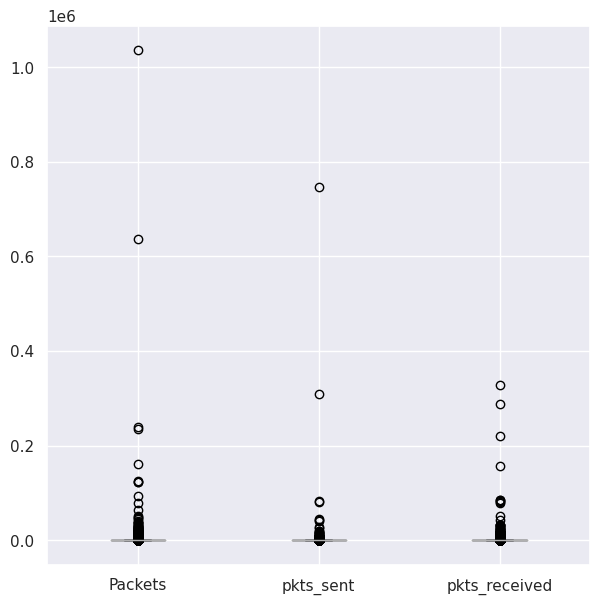

In [54]:
plt.figure(figsize=(7, 7))
df[['Packets', 'pkts_sent', 'pkts_received']].boxplot()
plt.show()

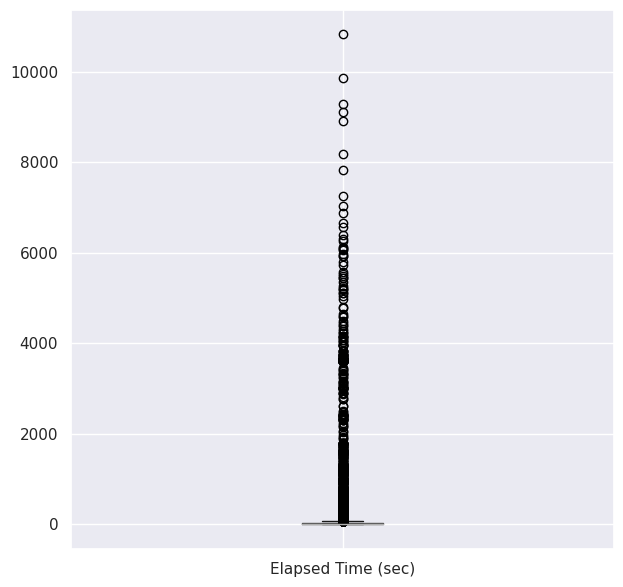

In [55]:
plt.figure(figsize=(7, 7))
df[['Elapsed Time (sec)']].boxplot()
plt.show()

<AxesSubplot: xlabel='Action', ylabel='count'>

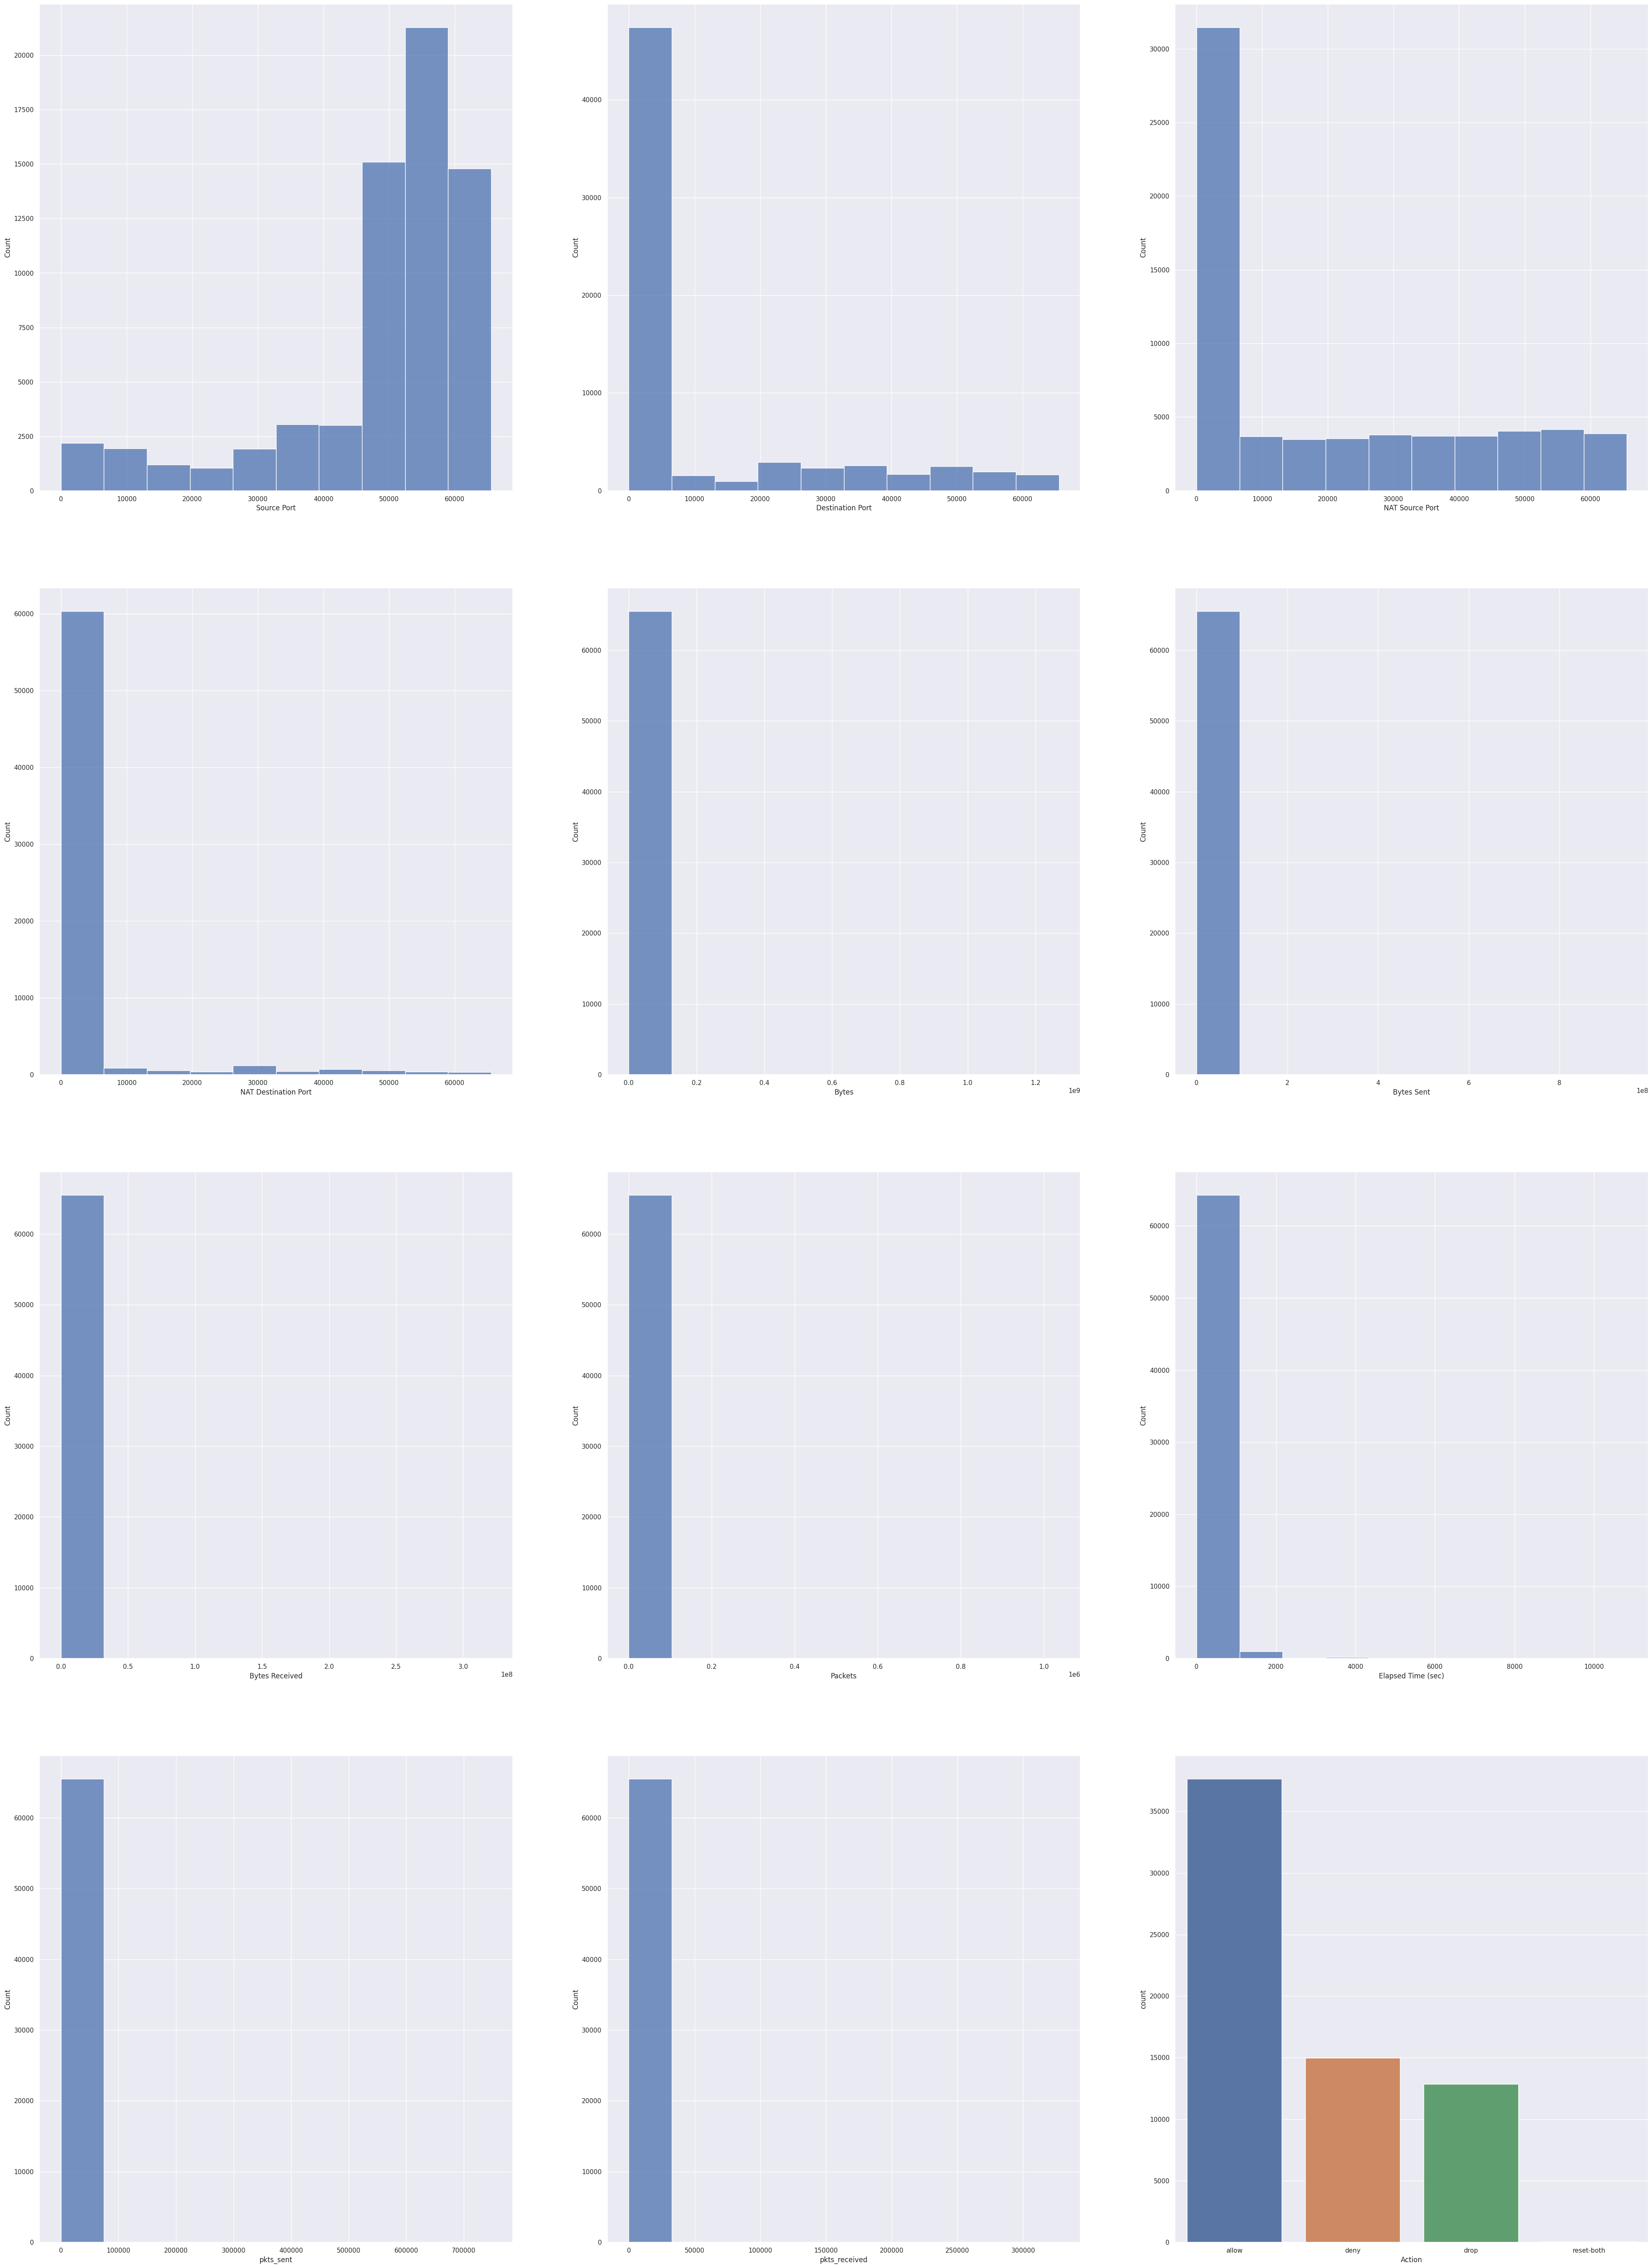

In [56]:
sns.set(rc = {'figure.figsize':(50,70)})
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3)
axes = [ax1, ax2, ax3,ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]
columns = df.columns
columns = columns.delete(4)
for i in range(len(axes)):
  sns.histplot(data=df, x=columns[i], bins=10, ax=axes[i])
sns.countplot(data=df, x='Action', ax=ax12)

/tmp/ipykernel_9661/2767425661.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


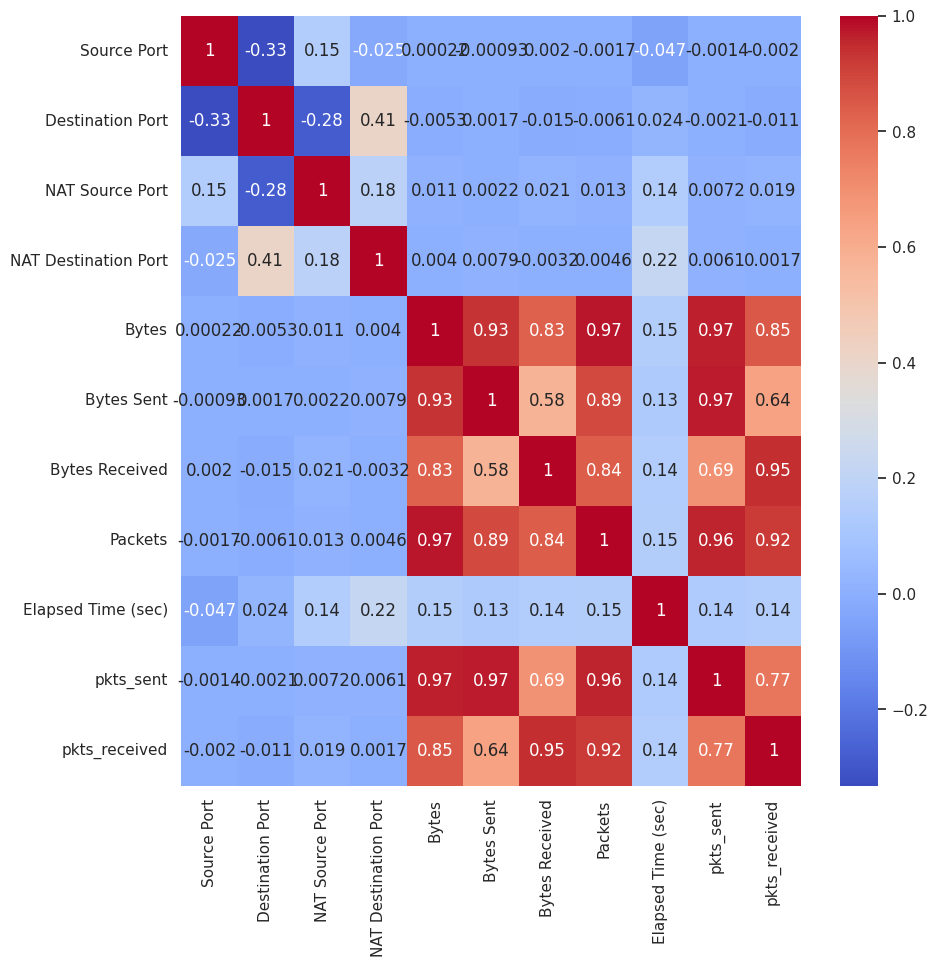

In [57]:
#Heat Map
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [58]:
#checking for dublicate and if they are in then remove them
print("Number of duplicate records : ",df.duplicated().sum())
#drop duplicates
df.drop_duplicates(inplace=True)
print("Number of duplicate records(After drop) : ",df.duplicated().sum())

Number of duplicate records :  8362
Number of duplicate records(After drop) :  0


In [16]:
Model(df.drop("Action", axis=1), df["Action"])


/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     11188
           1       0.97      0.98      0.98      2459
           2       1.00      1.00      1.00      3494
           3       0.00      0.00      0.00        10

    accuracy                           0.99     17151
   macro avg       0.74      0.74      0.74     17151
weighted avg       0.99      0.99      0.99     17151

AucRoc Score :  0.9233753677940305
Mathew Correlation Coefficient :  0.9873902362920995


In [59]:

#remove highly correlated features

threshold = 0.8

cor_mat = df.corr().abs()
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(to_drop)
df = df.drop(to_drop, axis=1)

['Bytes Sent', 'Bytes Received', 'Packets', 'pkts_sent', 'pkts_received']


/tmp/ipykernel_9661/4238188049.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr().abs()
/tmp/ipykernel_9661/4238188049.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))


In [18]:
Model(df.drop("Action", axis=1), df["Action"])


/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     11188
           1       0.97      0.98      0.98      2459
           2       1.00      1.00      1.00      3494
           3       0.00      0.00      0.00        10

    accuracy                           0.99     17151
   macro avg       0.74      0.74      0.74     17151
weighted avg       0.99      0.99      0.99     17151

AucRoc Score :  0.923368030088116
Mathew Correlation Coefficient :  0.986361608699425


In [60]:
#after removing highly correlated features now lets we apply normalization

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
col1s = df.columns.drop('Action')
df[col1s] = qt.fit_transform(df[col1s])
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Elapsed Time (sec)
12284,-2.123530,-1.061248,0.714362,-0.035170,allow,0.209822,0.359209
64627,-0.034044,1.303557,-5.199338,-5.199338,deny,-1.149133,-5.199338
41220,0.445061,0.979857,-0.093138,1.532252,allow,-0.617243,-0.259057
32498,-0.508237,-1.061248,2.092163,-0.035170,allow,0.037684,0.704756
1131,-0.301947,-1.061248,1.033987,-0.035170,allow,0.209822,0.704756


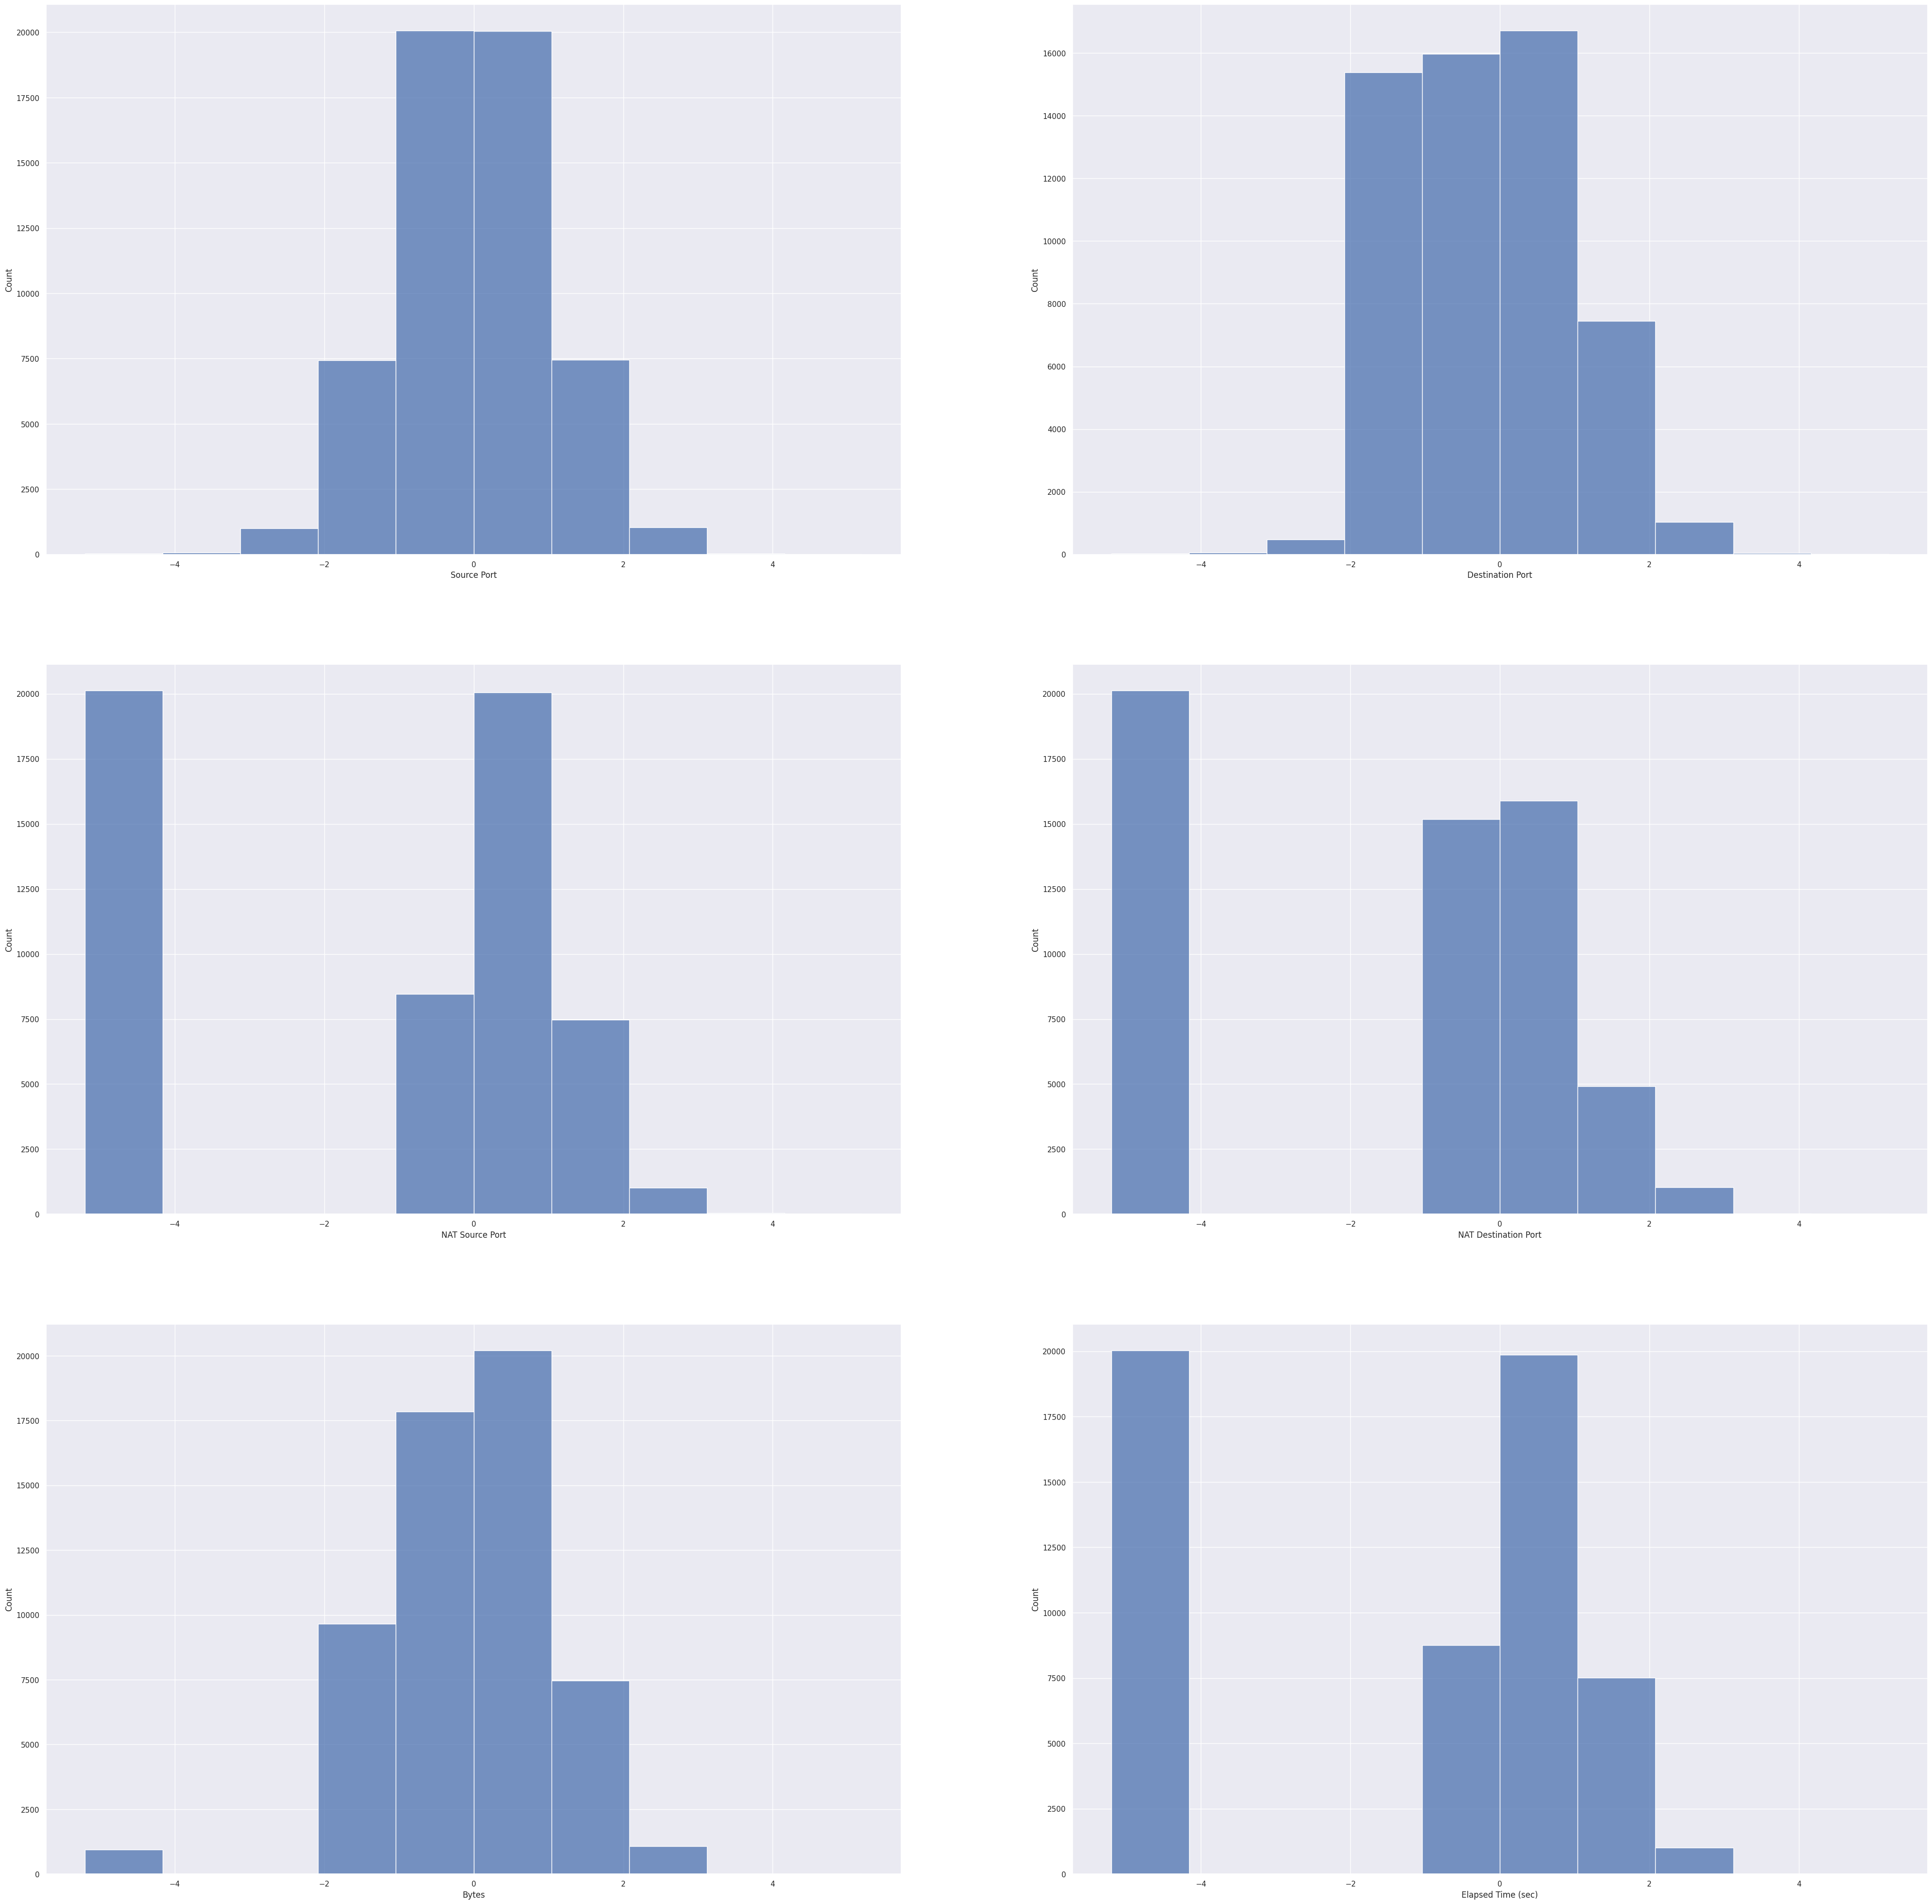

In [61]:
sns.set(rc = {'figure.figsize':(50,50)})
fig, ((ax1, ax2),(ax3, ax4) ,(ax5, ax6)) = plt.subplots(3, 2)
axes = [ax1, ax2, ax3,ax4, ax5, ax6]
columns = df.columns
columns = columns.delete(4)
for i in range(len(axes)):
  sns.histplot(data=df, x=columns[i], multiple='stack', bins=10, ax=axes[i])

In [62]:
Model(df.drop("Action", axis=1), df["Action"])

/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11188
        deny       1.00      1.00      1.00      2459
        drop       1.00      1.00      1.00      3494
  reset-both       0.00      0.00      0.00        10

    accuracy                           1.00     17151
   macro avg       0.75      0.75      0.75     17151
weighted avg       1.00      1.00      1.00     17151

AucRoc Score :  0.9614503336971016
Mathew Correlation Coefficient :  0.9974961733455713


In [63]:
#Now Lets remove Outliers to check the result

cols = df.columns.drop(['Action', 'Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port'])
for i in cols:
  q75,q25 = np.percentile(df.loc[:,i],[75,25])
  intr_qr = q75-q25
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
  df.loc[df[i] < min,i] = np.nan
  df.loc[df[i] > max,i] = np.nan
df.dropna(axis=0, inplace=True)

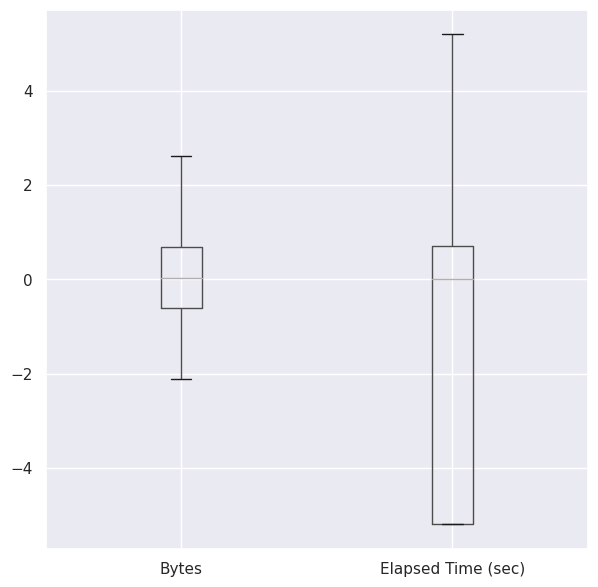

In [64]:
plt.figure(figsize=(7, 7))
df[cols].boxplot()
plt.show()

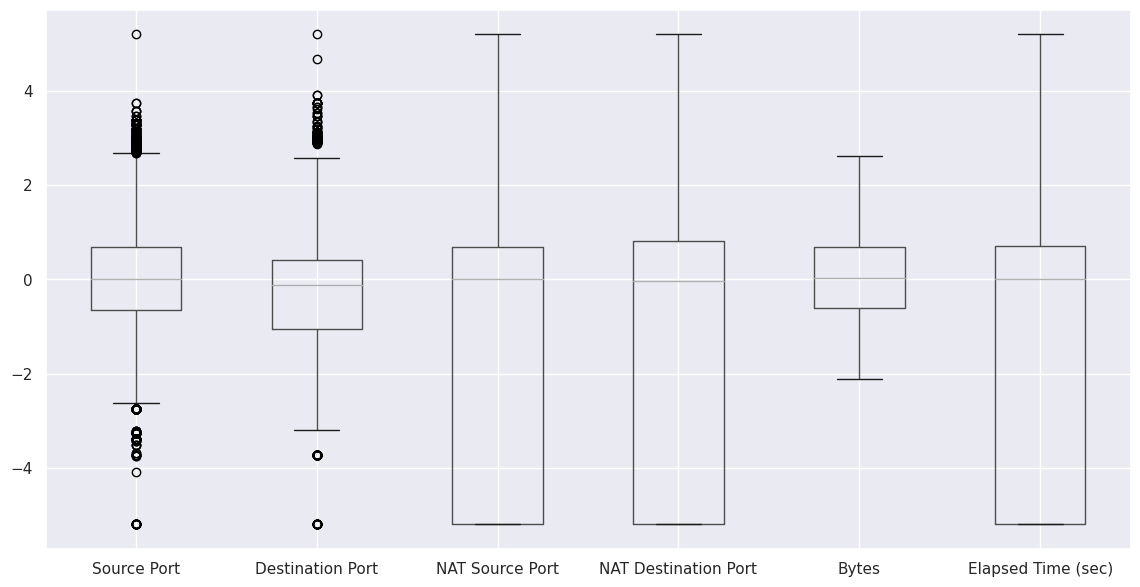

In [65]:
plt.figure(figsize=(14, 7))
df.boxplot()
plt.show()

In [66]:
Model(df.drop("Action", axis=1), df["Action"])

/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11059
        deny       0.99      0.99      0.99      2220
        drop       1.00      1.00      1.00      3502
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     16794
   macro avg       0.75      0.75      0.75     16794
weighted avg       1.00      1.00      1.00     16794

AucRoc Score :  0.9120721528115513
Mathew Correlation Coefficient :  0.9967009303441887


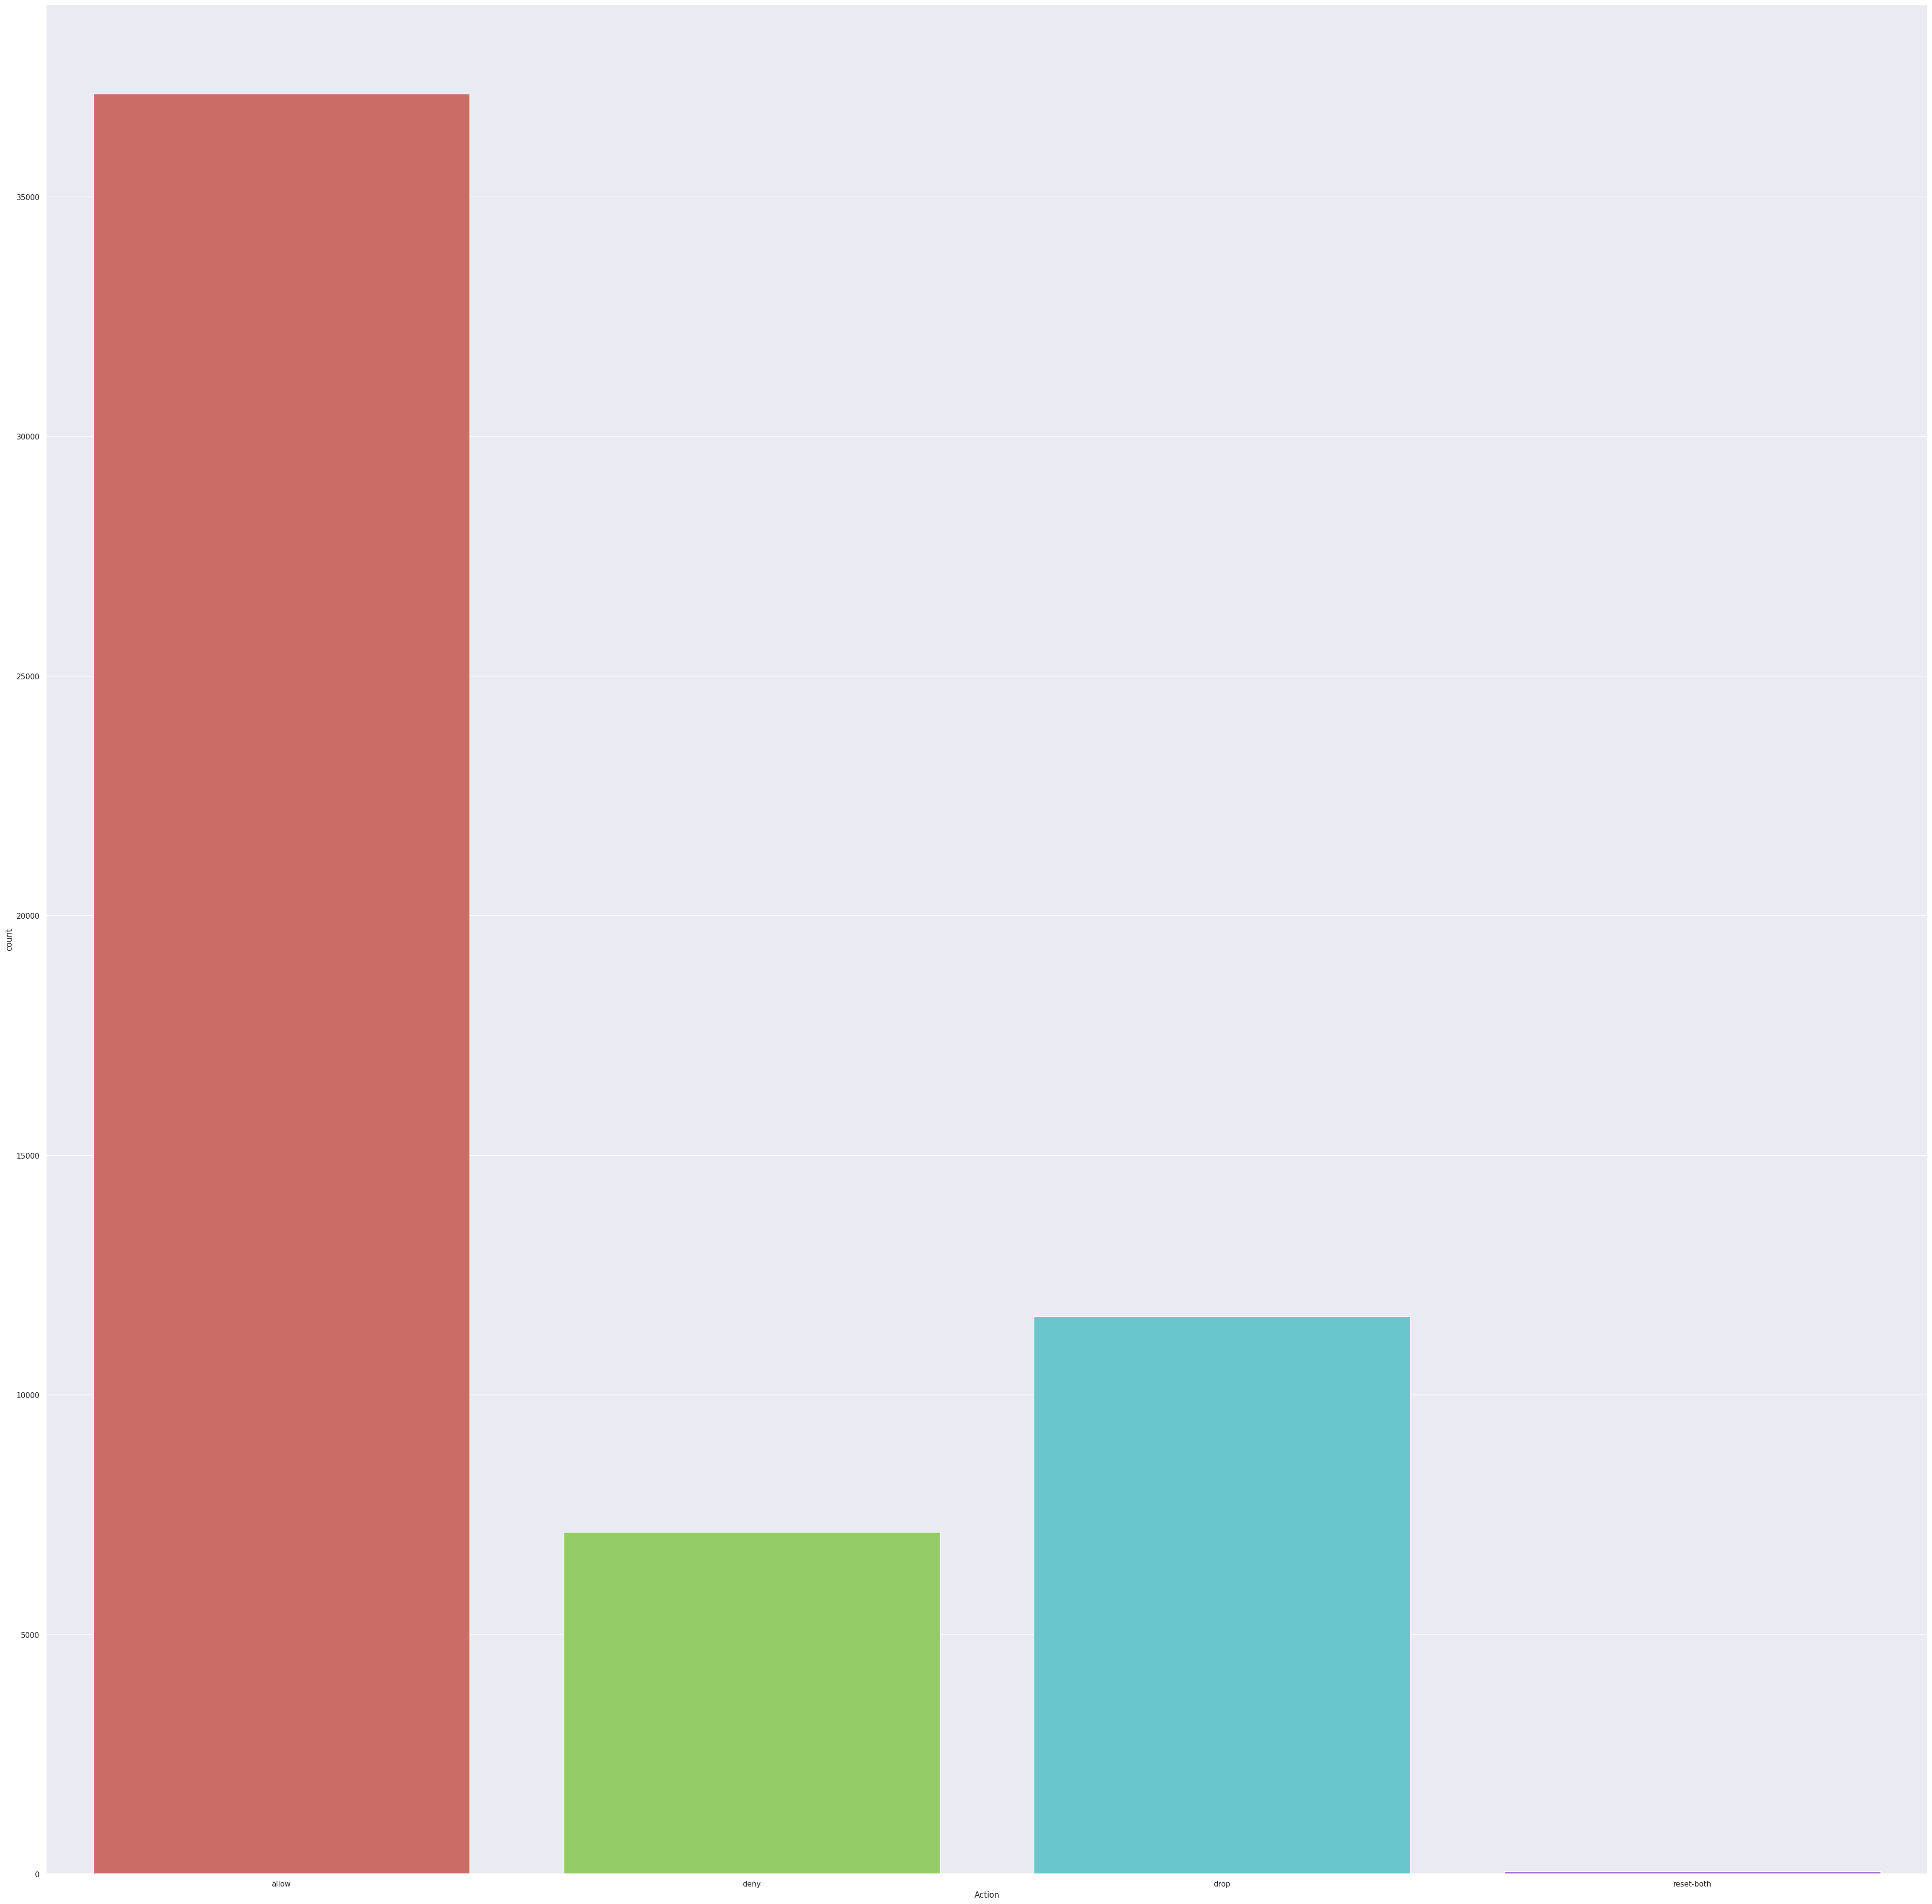

In [67]:
sns.countplot(x='Action',data=df,palette='hls')
plt.show()

In [68]:
y = df['Action'].values
y = y.reshape(-1,1)
x = df.drop(['Action'],axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state= 300)

# decision tree classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing

dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_forecast=dt.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, dt.predict(x_test)))
print('accuracy:{:.4f}'.format(dt.score(x_test, y_test)))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11149
        deny       0.99      0.99      0.99      2105
        drop       1.00      1.00      1.00      3527
  reset-both       0.56      0.77      0.65        13

    accuracy                           1.00     16794
   macro avg       0.89      0.94      0.91     16794
weighted avg       1.00      1.00      1.00     16794

accuracy:0.9977


# Nave Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(x_train, y_train.ravel())
y_forecast=nb.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, nb.predict(x_test)))
print('accuracy: {:.4f}'.format(nb.score(x_test, y_test)))

              precision    recall  f1-score   support

       allow       1.00      0.98      0.99     11149
        deny       1.00      0.99      0.99      2105
        drop       1.00      1.00      1.00      3527
  reset-both       0.02      0.31      0.03        13

    accuracy                           0.99     16794
   macro avg       0.75      0.82      0.75     16794
weighted avg       1.00      0.99      0.99     16794

accuracy: 0.9852


# Logistic Regreession Classifier

In [71]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr = lr.fit(x_train, y_train.ravel())
y_forecast=lr.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(x_test)))
print('accuracy:{:.4f}'.format(lr.score(x_test, y_test)))

/home/why_feen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11149
        deny       0.99      0.95      0.97      2105
        drop       0.97      1.00      0.98      3527
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     16794
   macro avg       0.74      0.74      0.74     16794
weighted avg       0.99      0.99      0.99     16794

accuracy:0.9923


/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/why_feen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
#hyperparameters tuning
from sklearn.model_selection import GridSearchCV
hyperparameters = dict(n_neighbors=list(range(3, 30, 2)))
clf = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=10)
best_model = clf.fit(df.drop("Action", axis=1), df["Action"])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 7


In [72]:
#save the model
import pickle
filename='savedmodel.sav'
pickle.dump(dt, open(filename,'wb'))

In [73]:
x_test.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Elapsed Time (sec)
18031,1.131013,0.413338,-5.199338,-5.199338,-0.617243,-5.199338
47504,1.071313,-0.110739,1.576851,0.815424,0.953345,1.730995
52219,0.761610,-1.061248,1.530897,-0.035170,0.174181,0.359209
9396,-0.998648,1.976518,-5.199338,-5.199338,-1.738264,-5.199338
65009,0.086581,0.413338,-5.199338,-5.199338,-0.617243,-5.199338


In [74]:
load_model=pickle.load(open(filename,'rb'))

In [75]:
load_model.predict([[-1.054671, -0.110739, 1.179224, 0.815424, 1.525985, -0.090543]])

/home/why_feen/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['allow'], dtype=object)